# **Importing Packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from google.colab import drive
import os


# **Understanding Data**

**1. Importing Data and preview of Data**

In [ ]:
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/Colab Notebooks")
df1 = pd.read_csv('heart.csv')
df2 = pd.read_csv('o2Saturation.csv')
df = df1.merge(df2, left_index=True, right_index=True)
df.head()

Mounted at /content/drive/


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.6
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,98.1


**2. Data Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   trtbps        303 non-null    int64  
 4   chol          303 non-null    int64  
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalachh      303 non-null    int64  
 8   exng          303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slp           303 non-null    int64  
 11  caa           303 non-null    int64  
 12  thall         303 non-null    int64  
 13  output        303 non-null    int64  
 14  o2Saturation  303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 37.9 KB


# **Data Preparation**

**3. Get Column Names**

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'o2Saturation'],
      dtype='object')

**4. Change some Column Names**

In [ ]:
df.rename(columns={"cp": "chest_pain",
                   "trtbps":"blood_pressure",
                   "chol":"cholestoral",
                   "fbs":"fasting_blood_sugar",
                   "thalachh":"max_heart_rate",
                   "exng":"angina",
                   "caa": "n_vessels",
                   "output":"heart_attack"},
          inplace=True)

df['sex'].replace({0:'Female', 1:'Male'}, inplace=True)

li = df.columns.tolist()
li[0],li[1],li[-2],li[-1] = li[1],li[0],li[-1],li[-2]
df = df[li]

df.head()

,sex,age,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,slp,n_vessels,thall,o2Saturation,heart_attack
0,Male,63,3,145,233,1,0,150,0,2.3,0,0,1,98.6,1
1,Male,37,2,130,250,0,1,187,0,3.5,0,0,2,98.6,1
2,Female,41,1,130,204,0,0,172,0,1.4,2,0,2,98.6,1
3,Male,56,1,120,236,0,1,178,0,0.8,2,0,2,98.6,1
4,Female,57,0,120,354,0,1,163,1,0.6,2,0,2,98.1,1


**5. Summary statistics**

In [ ]:
con_cols = ['age','blood_pressure','cholestoral','max_heart_rate','o2Saturation']
df[con_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_heart_rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
o2Saturation,303.0,97.484488,0.352649,96.5,97.5,97.5,97.5,98.6


# **Data Cleaning**

**6. Null Data**

In [ ]:
df.isnull().sum()

sex                    0
age                    0
chest_pain             0
blood_pressure         0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_heart_rate         0
angina                 0
oldpeak                0
slp                    0
n_vessels              0
thall                  0
o2Saturation           0
heart_attack           0
dtype: int64

**7. Remove duplicates**

In [ ]:
df[df.duplicated()]

,sex,age,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,slp,n_vessels,thall,o2Saturation,heart_attack
164,Male,38,2,138,175,0,1,173,0,0.0,2,4,2,97.5,1


In [ ]:
df.drop_duplicates(inplace=True)

# **Data Visualization & Getting Analysis**

**8.Let's see the distribution of age column**

Text(0.5, 0, 'Age')

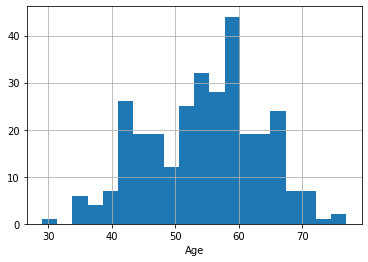

In [ ]:
df["age"].hist(bins=20)
plt.xlabel("Age")

**9. Let's visualize the same distribution in seaborn**

<Figure size 576x576 with 0 Axes>

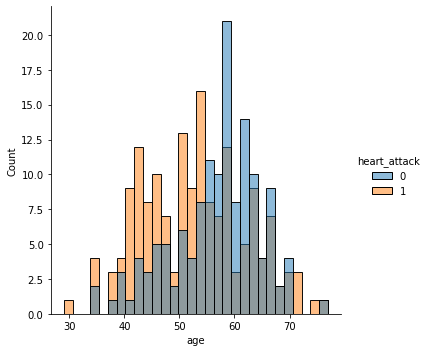

In [ ]:
plt.figure(figsize=(8, 8))
sns.displot(x="age", data=df, hue="heart_attack", bins=30, color="BlGr")

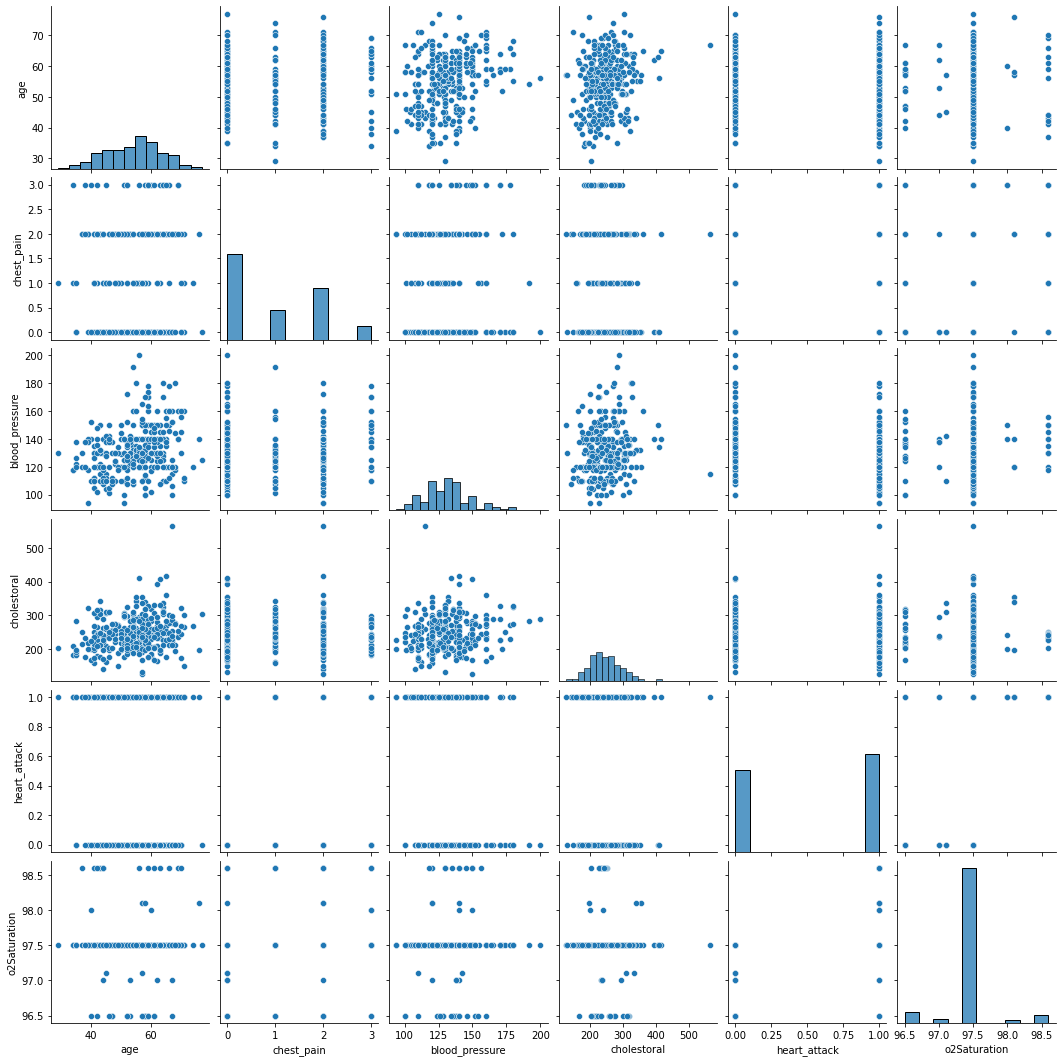

In [ ]:
sns.pairplot(df[["age", "chest_pain", "blood_pressure", 'cholestoral', 'heart_attack', 'o2Saturation']])

**10. Count plot of categorical features**



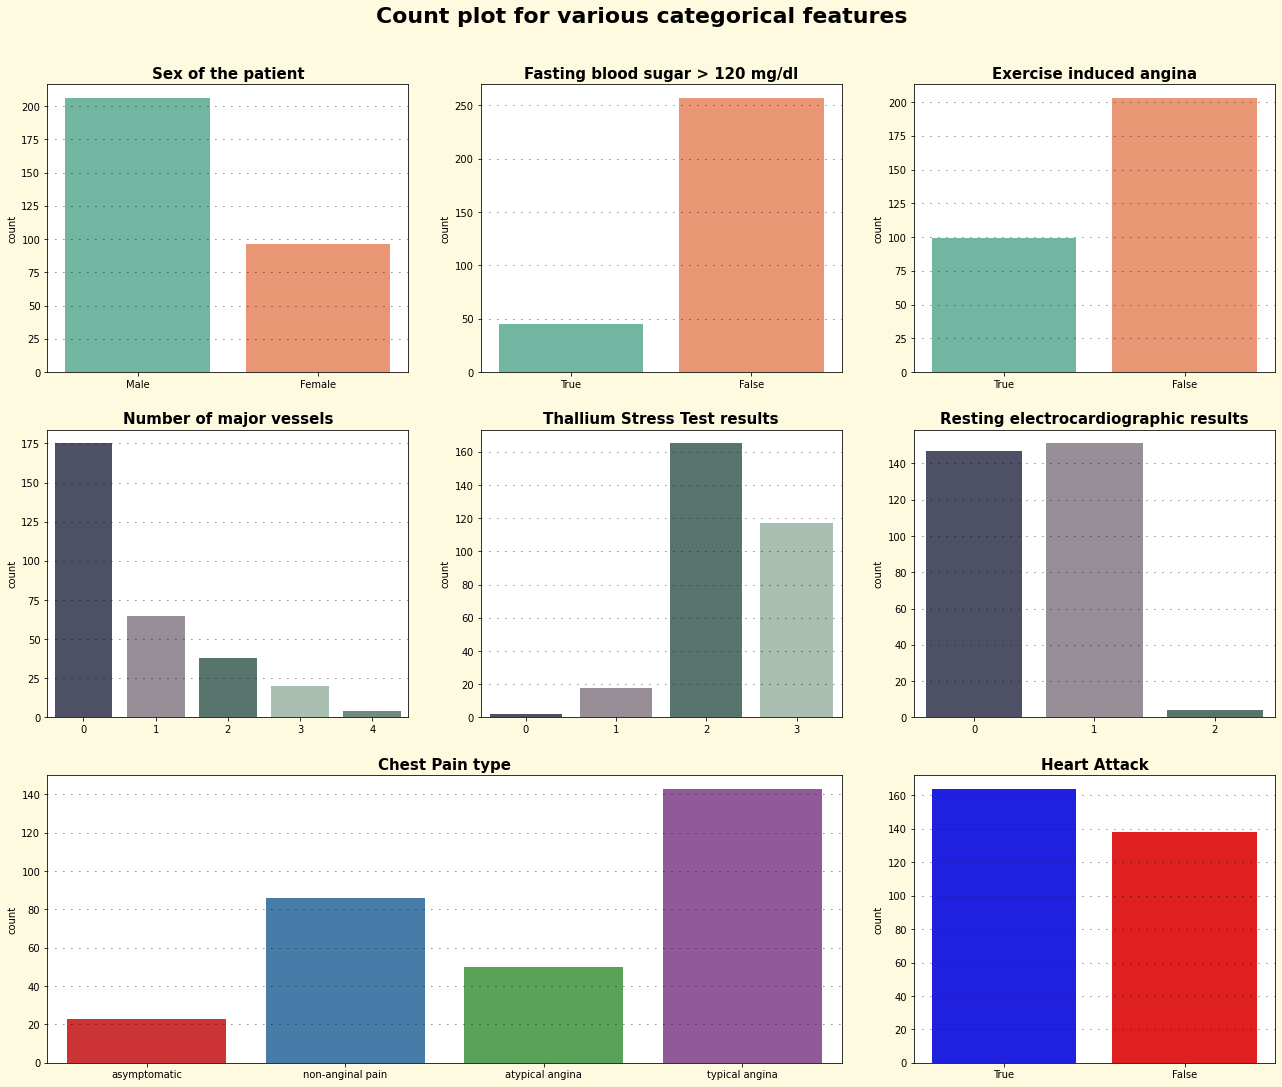

In [ ]:
fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(3,3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])  
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,:-1])
ax8 = fig.add_subplot(gs[2,2])

fig.suptitle(t='Count plot for various categorical features',y=0.94, fontweight ="bold",fontsize=22)
fig.set_facecolor("#fefae0")
color_platte = ['#4a4e69','#9a8c98','#52796f','#a4c3b2','#6b9080']

# Sex 
ax1.set_title('Sex of the patient',fontweight ="bold",fontsize=15)
ax1.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax1,data=df,x='sex',palette = 'Set2')
ax1.set_xlabel("")



# fasting blood sugar 
ax2.set_title('Fasting blood sugar > 120 mg/dl',fontweight ="bold",fontsize=15)
ax2.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax2,data=df,x='fasting_blood_sugar',order=[True,False],palette = 'Set2')
ax2.set_xlabel("")

# angina 
ax3.set_title('Exercise induced angina',fontweight ="bold",fontsize=15)
ax3.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax3,data=df,x='angina',order=[True, False],palette = 'Set2')
ax3.set_xlabel("")

# numbers of vessels 
ax4.set_title('Number of major vessels',fontweight ="bold",fontsize=15)
ax4.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax4,data=df,x='n_vessels',palette = color_platte)
ax4.set_xlabel("")

# thall 
ax5.set_title('Thallium Stress Test results',fontweight ="bold",fontsize=15)
ax5.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax5,data=df,x='thall',palette = color_platte)
ax5.set_xlabel("")

# restecg 
ax6.set_title('Resting electrocardiographic results',fontweight ="bold",fontsize=15)
ax6.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax6,data=df,x='restecg',palette = color_platte)
ax6.set_xlabel("")

# chest pain
leges = {0: 'typical angina',1: 'atypical angina',2: 'non-anginal pain',3: 'asymptomatic'}
ax7.set_title('Chest Pain type',fontweight ="bold",fontsize=15)
ax7.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax7,data=df.assign(chest_pain = df['chest_pain'].replace(leges)),x='chest_pain',palette = 'Set1')
ax7.set_xlabel("")

# Heart Attack 
ax8.set_title('Heart Attack',fontweight ="bold",fontsize=15)
ax8.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax8,data=df,x='heart_attack',order=[True, False],palette = ['blue','red'])
ax8.set_xlabel("")
plt.show()

**11. Distribution of continuous features according to target variable**



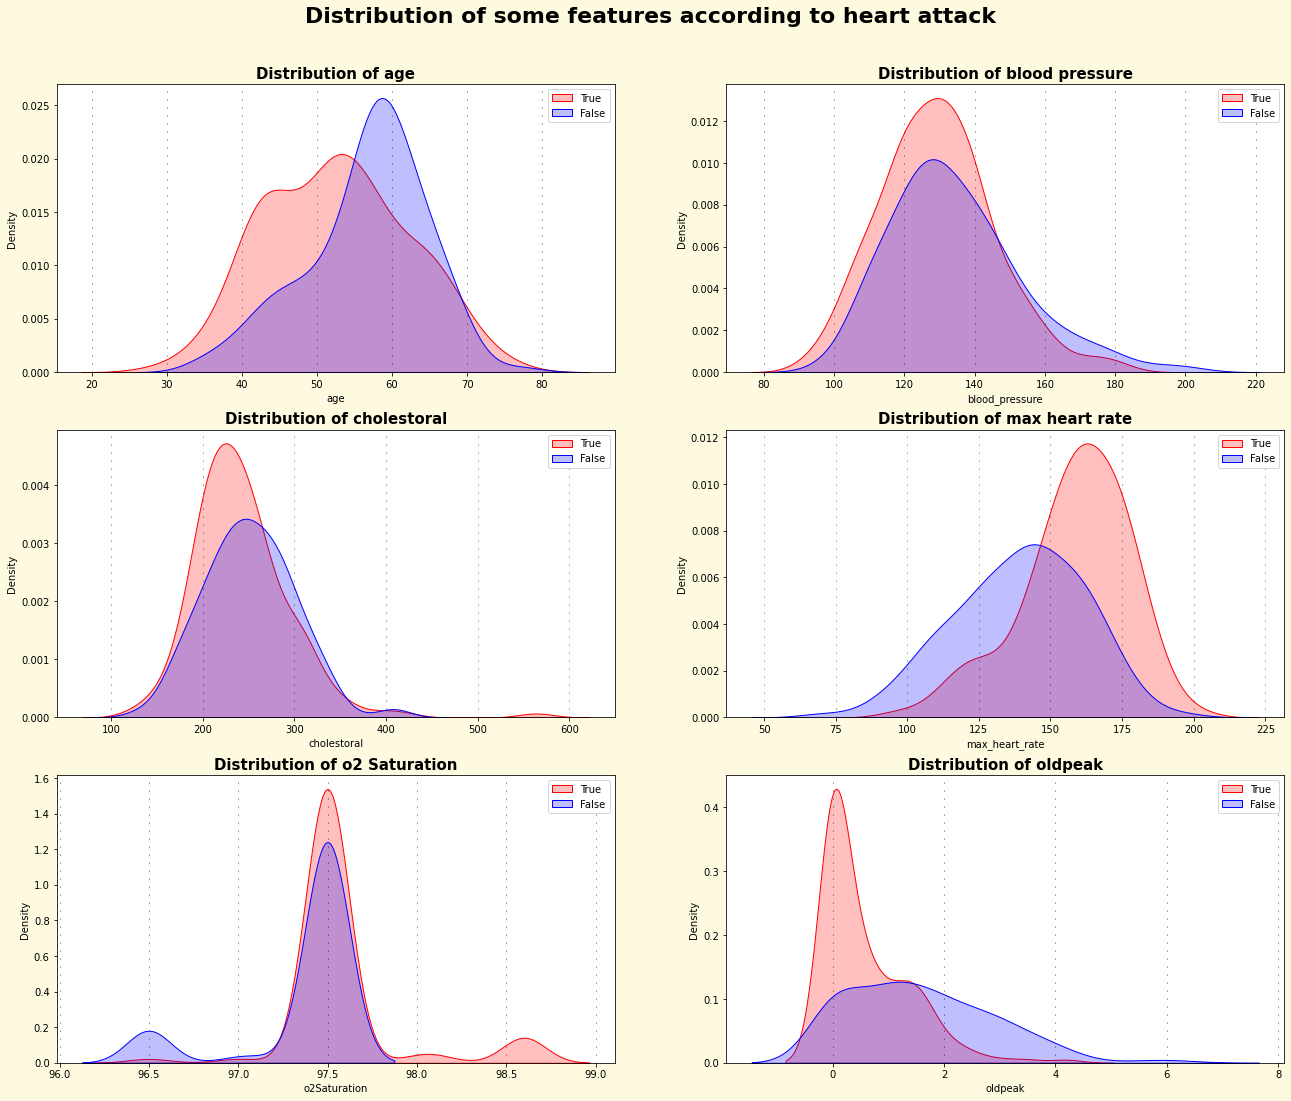

In [ ]:
fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])


fig.suptitle(t='Distribution of some features according to heart attack',y=0.94, fontweight ="bold",fontsize=22)
fig.set_facecolor("#fefae0")
color_platte = ['#4a4e69','#9a8c98','#52796f','#a4c3b2','#6b9080']

# age 
ax1.set_title('Distribution of age',fontweight ="bold",fontsize=15)
ax1.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax1,data=df,x='age', hue='heart_attack', fill=True, palette = ['blue','red'])
ax1.legend([True, False])

# blood_pressure 
ax2.set_title('Distribution of blood pressure',fontweight ="bold",fontsize=15)
ax2.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax2,data=df,x='blood_pressure', hue='heart_attack', fill=True, palette = ['blue','red'])
ax2.legend([True, False])

# cholestoral 
ax3.set_title('Distribution of cholestoral',fontweight ="bold",fontsize=15)
ax3.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax3,data=df,x='cholestoral', hue='heart_attack', fill=True, palette = ['blue','red'])
ax3.legend([True, False])

# blood_pressure 
ax4.set_title('Distribution of max heart rate',fontweight ="bold",fontsize=15)
ax4.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax4,data=df,x='max_heart_rate', hue='heart_attack', fill=True, palette = ['blue','red'])
ax4.legend([True, False])

# o2Saturation 
ax5.set_title('Distribution of o2 Saturation',fontweight ="bold",fontsize=15)
ax5.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax5,data=df,x='o2Saturation', hue='heart_attack', fill=True, palette = ['blue','red'])
ax5.legend([True, False])

# oldpeak 
ax6.set_title('Distribution of oldpeak',fontweight ="bold",fontsize=15)
ax6.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
sns.kdeplot(ax=ax6,data=df,x='oldpeak', hue='heart_attack', fill=True, palette = ['blue','red'])
ax6.legend([True, False])

plt.show()

**12. Chest Pain type**



/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

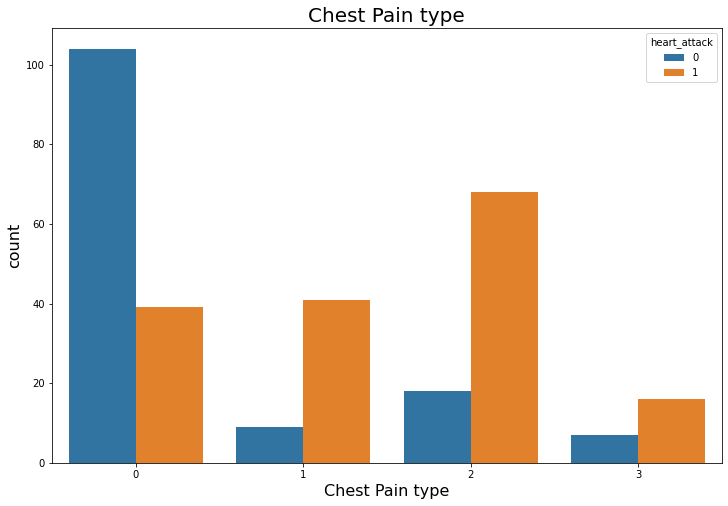

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot('chest_pain',hue='heart_attack',data=df)
plt.title("Chest Pain type",size=20)
plt.xlabel("Chest Pain type",size=16)
plt.ylabel("count",size=16)

***-> peoble who suffer from non-anginal pain have more chance of heart attack***



**13. fasting blood sugar**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

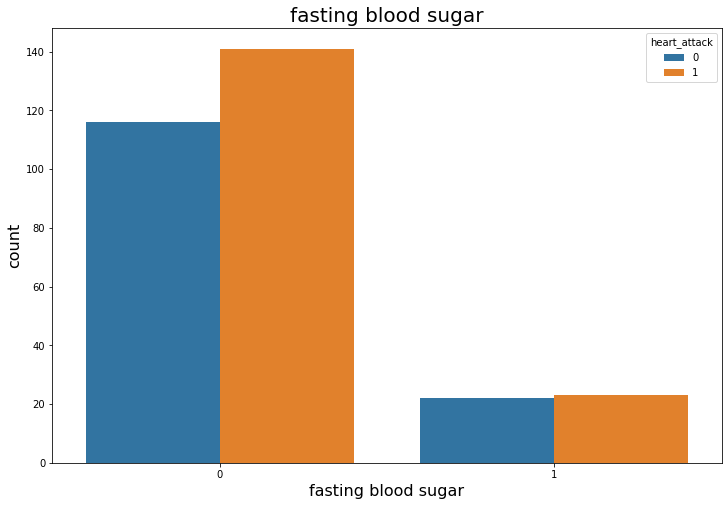

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot('fasting_blood_sugar',hue='heart_attack',data=df)
plt.title("fasting blood sugar",size=20)
plt.xlabel("fasting blood sugar",size=16)
plt.ylabel("count",size=16)

***-> peoble have less than 120 in fasting blood sugar have more chance of heart attack***



**14. Resting electrocardiographic results**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

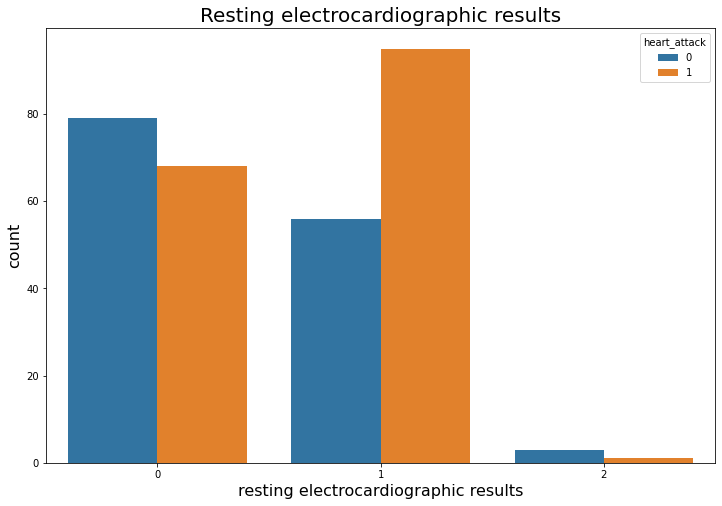

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot('restecg',hue='heart_attack',data=df)
plt.title("Resting electrocardiographic results",size=20)
plt.xlabel("resting electrocardiographic results",size=16)
plt.ylabel("count",size=16)

***-> people having ST-T wave abnormality have more chance of heart attack***

**15. Number of major vessels**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

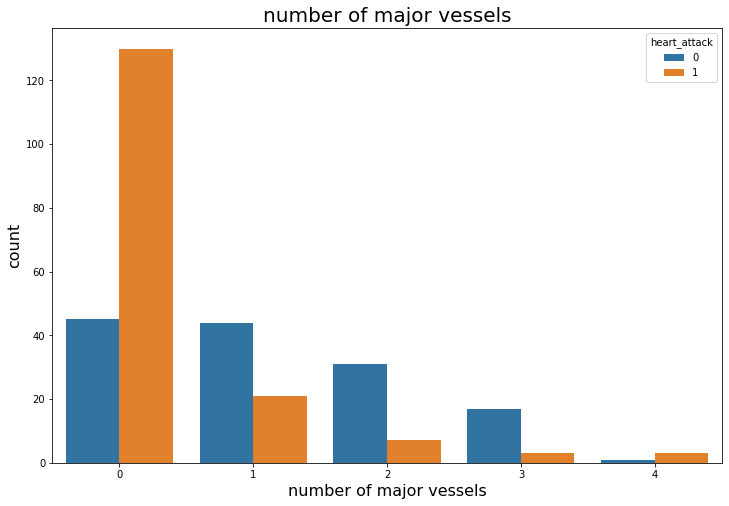

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot('n_vessels',hue='heart_attack',data=df)
plt.title("number of major vessels",size=20)
plt.xlabel("number of major vessels",size=16)
plt.ylabel("count",size=16)

***-> peoble having zero of major vessels have more chance of heart attack***



**16. exercise induced angina**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

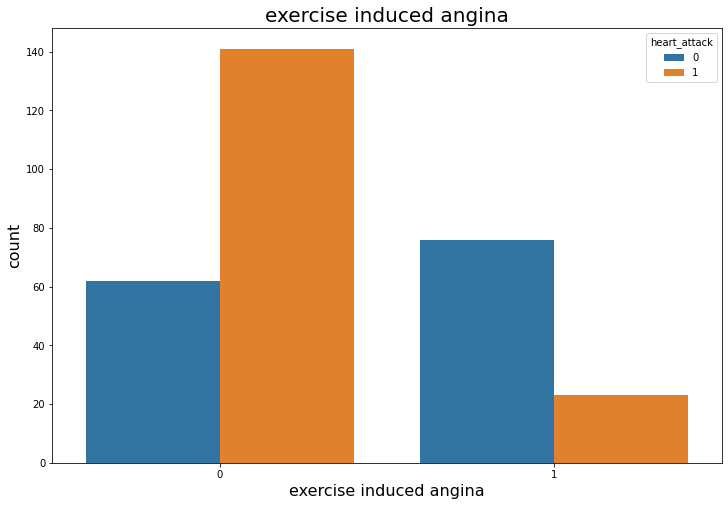

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot('angina',hue='heart_attack',data=df)
plt.title("exercise induced angina",size=20)
plt.xlabel("exercise induced angina",size=16)
plt.ylabel("count",size=16)

***-> peoble with no exercise induced angina have more chance of heart attack***



**17. Gender**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

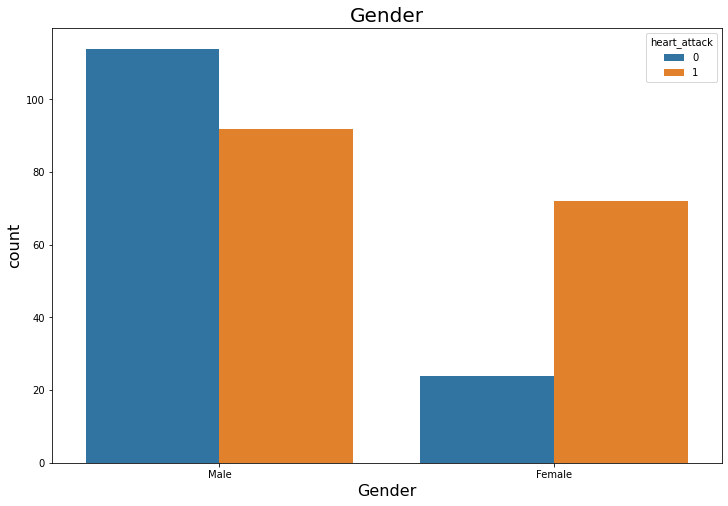

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot('sex',hue='heart_attack',data=df)
plt.title("Gender",size=20)
plt.xlabel("Gender",size=16)
plt.ylabel("count",size=16)

***-> The chance of heart attack is more between men***



**18. Age**

Text(0, 0.5, 'count')

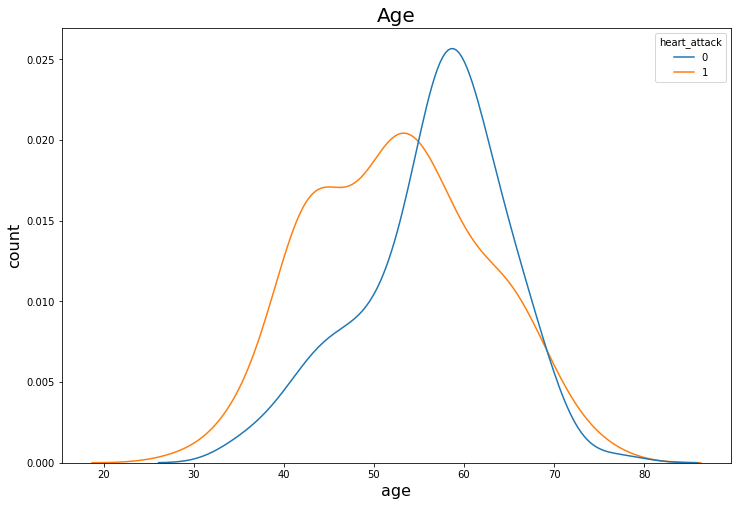

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot('age',hue='heart_attack',data=df)
plt.title("Age",size=20)
plt.xlabel("age",size=16)
plt.ylabel("count",size=16)

***-> the chance of heart attack increase from age 30 until age 65***



**19. Resting blood pressure**

Text(0, 0.5, 'count')

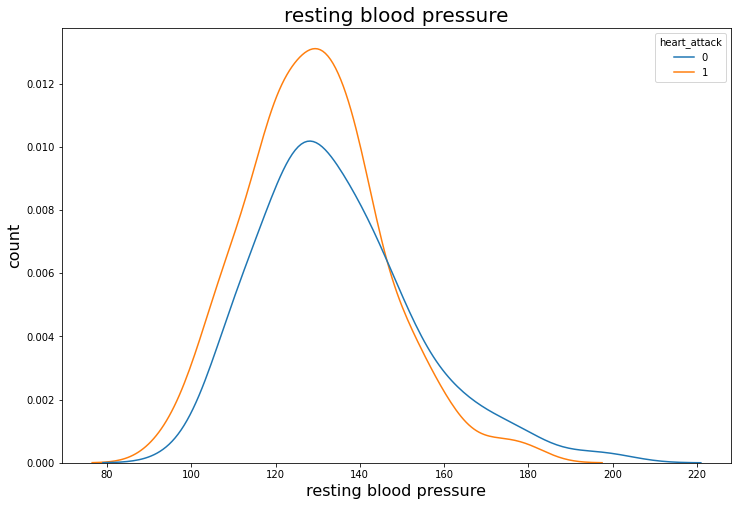

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot('blood_pressure',hue='heart_attack',data=df)
plt.title("resting blood pressure",size=20)
plt.xlabel("resting blood pressure",size=16)
plt.ylabel("count",size=16)

***-> the chance of heart attack is more when the resting blood pressure approximately between 100-150***



**20. cholestoral in mg/dl fetched via BMI sensor**

Text(0, 0.5, 'count')

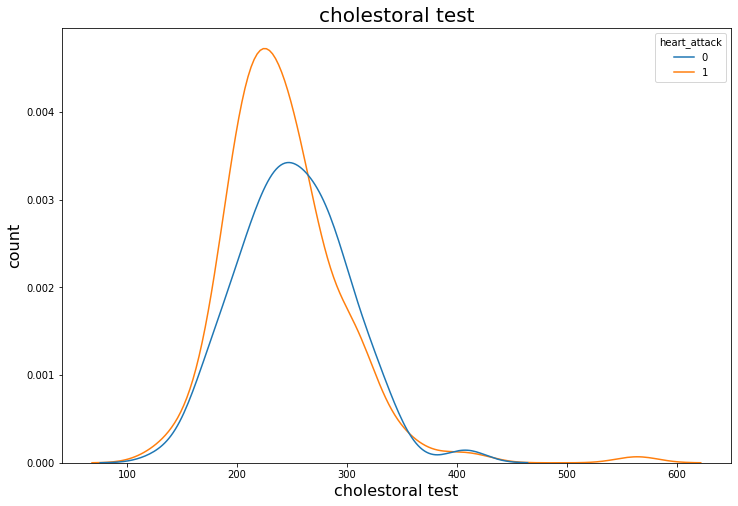

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot('cholestoral',hue='heart_attack',data=df)
plt.title("cholestoral test",size=20)
plt.xlabel("cholestoral test",size=16)
plt.ylabel("count",size=16)

***-> the chance of heart attack is more when cholestoral approximately between 150-300***



# **Final Report**

1. People who suffer from non-anginal pain have more chance of heart attack
2. People having fasting blood sugar level less than 120 have more chance of heart attack
3. People having ST-T wave abnormality have more chance of heart attack
4. People having zero of major vessels have more chance of heart attack
5. People with no exercise induced angina have more chance of heart attack
6. The chance of heart attack is more in men
7. The chance of heart attack increases after age 30
8. The chance of heart attack is more when the resting blood pressure is approximately between 100-150
9. The chance of heart attack is more when cholestoral is approximately between 150-300